# Marching Squares

Marching Squares is a computer graphics algorithm that computes contours for a 2D scalar field, that is, a rectangular array of individual numerical values (“Marching squares”, 2019). It can be used to generate the contours of a kernel density map (Lu et al., 2020).

## Material

- [Wikipedia page](https://en.wikipedia.org/wiki/Marching_squares) (“Marching squares”, 2019).
- ["Isosurfaces: Geometry, Topology, and Algorithms" book](http://web.cse.ohio-state.edu/~wenger.4/publications/) (Wenger, 2013). 
- [*scikit-image* (or *skimage*) library](https://scikit-image.org/) (van der Walt et al., 2014).
- [`skimage.measure.find_contours` function](https://scikit-image.org/docs/stable/api/skimage.measure.html#find-contours) (van der Walt et al., 2014).

## References

Wikipedia contributors. (2019, December 30). 
Marching squares. 
In *Wikipedia, The Free Encyclopedia*.
Retrieved 12:13, February 26, 2020, from https://en.wikipedia.org/w/index.php?title=Marching_squares&oldid=933213691

Lu, M., Wang, S., Lanir, J., Fish, N., Yue, Y., Cohen-Or, D., & Huang, H. (2020). Winglets: Visualizing Association with Uncertainty in Multi-class Scatterplots. *IEEE Transactions on Visualization and Computer Graphics, 26*(1), 770–779. 
https://doi.org/10.1109/TVCG.2019.2934811

Wenger, R. (2013).
*Isosurfaces*. 
New York: A K Peters/CRC Press.
https://doi.org/10.1201/b15025

van der Walt, S., Schönberger, J.L., Nunez-Iglesias, J., Boulogne, F., Warner, J.D., Yager, N., Gouillart, E., Yu, T., & scikit-image contributors. (2014).
scikit-image: image processing in Python. 
*PeerJ, 2*, e453.
https://doi.org/10.7717/peerj.453

In [1]:
import numpy as np
from skimage import measure
import matplotlib.pyplot as plt

In [2]:
print(f"NumPy: {np.__version__}")

NumPy: 1.18.1


In [3]:
# Generate dummy data (an image).

a = np.zeros((10, 10))

a[1, 8] = 1

for r in range(1,5):
    for c in range(1,5):
        if (r != 4 or c != 4):
            a[r, c] = 1
            a[r + 4, c + 4] = 1

# L-R = same y, different x.
# T-B = same x, different y.
a

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 1., 0., 0., 0., 1., 0.],
       [0., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 0.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 0.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 0.],
       [0., 0., 0., 0., 0., 1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [4]:
# The origin in the graphs below is in the bottom-left corner,
# instead of the top-left corner as usual for images:
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html

# This option for the origin was made so that the axes are ordered
# in the same way as is usual for a scatterplot, for example.

np.flip(a, axis=0) # Flip the image vertically.

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 0.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 0.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 1., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [5]:
# Find contours at a constant value of 0.50.

THRESHOLD = 0.50 # a.k.a. isovalue
contours = measure.find_contours(a, THRESHOLD)

# contours

In [6]:
x = [value for value in range(0, len(a))] * len(a)

# x

In [7]:
y = [item for sublist in [[value] * len(a) for value in range(0, len(a))] for item in sublist]

# y

In [8]:
a_flat = a.flatten()

# a_flat

In [9]:
clrs = ['green' if (x <= THRESHOLD) else 'none' for x in a_flat]

# clrs

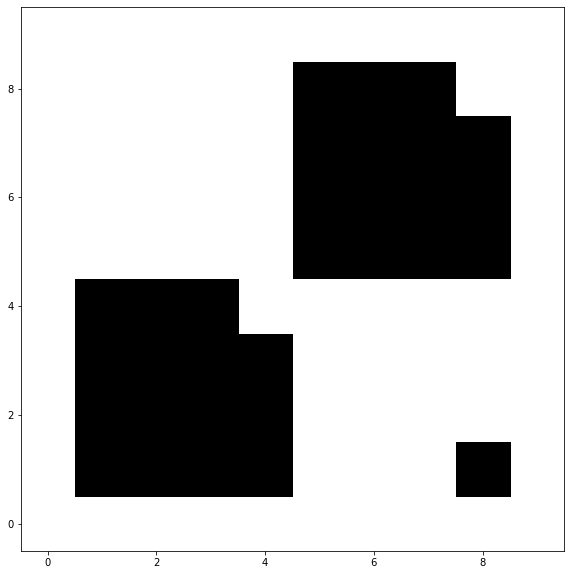

In [10]:
# Display the image.

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(a, cmap=plt.cm.gray_r, origin="lower")
plt.show()

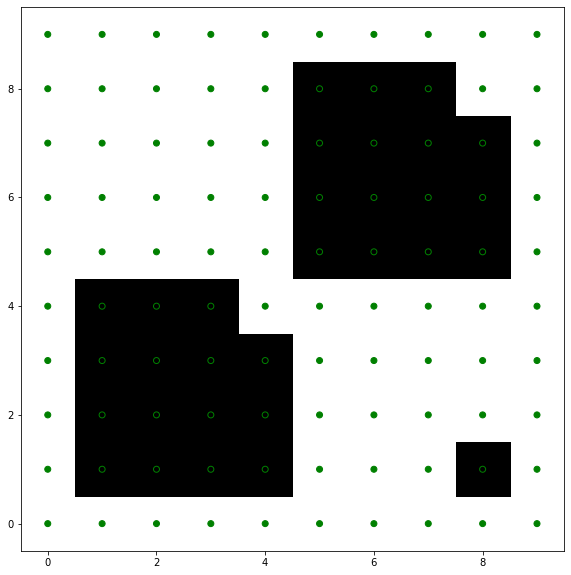

In [11]:
# Display the image and the binary index.

# The filled points are below the threshold.
# The unfilled points are above the threshold.

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(a, cmap=plt.cm.gray_r, origin="lower")

plt.scatter(x, y, c=clrs, edgecolors="green")

plt.show()

Coordinates (contour 1)
x: [3.  2.  1.  0.5 0.5 0.5 0.5 1.  2.  3.  4.  4.5 4.5 4.5 4.  3.5 3. ]
y: [4.5 4.5 4.5 4.  3.  2.  1.  0.5 0.5 0.5 0.5 1.  2.  3.  3.5 4.  4.5]

Coordinates (contour 2)
x: [8.  7.5 8.  8.5 8. ]
y: [1.5 1.  0.5 1.  1.5]

Coordinates (contour 3)
x: [7.  6.  5.  4.5 4.5 4.5 4.5 5.  6.  7.  8.  8.5 8.5 8.5 8.  7.5 7. ]
y: [8.5 8.5 8.5 8.  7.  6.  5.  4.5 4.5 4.5 4.5 5.  6.  7.  7.5 8.  8.5]



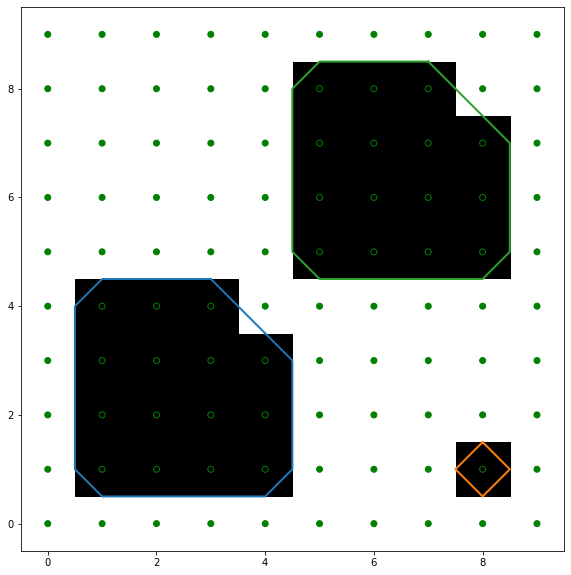

In [12]:
# Display the image, the binary index, and the contours.

# Every 2x2 block of pixels (or dots) forms a cell. 
# Marching Squares generates a contour line for each cell 
# according to the following lookup table:
# https://en.wikipedia.org/wiki/Marching_squares#Basic_algorithm

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(a, cmap=plt.cm.gray_r, origin="lower")

plt.scatter(x, y, c=clrs, edgecolors="green")

for n, contour in enumerate(contours):
    print(f"Coordinates (contour {n + 1})\nx: {contour[:, 1]}\ny: {contour[:, 0]}\n")
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2, zorder=1)
    
plt.show()

## Linear Interpolation

Considering, for example, the cell in the bottom-left corner, the exact position of the contour line (more specifically, the beginning and the end of the contour line) along the edges of this cell was computed with the following (abbreviated) algorithm (Wenger, 2013):

**Input**: 
- Two points or vertices of a cell (*p* and *q*).
- The scalar values associated with the aforementioned points according to the dataset or image (*sp* and *sq*).
- The threshold or isovalue (*t*).
- **Note**: The coordinates of the points can be checked on the graph axes.
    
**Output**:
- A point lying on [*p*, *q*] (*r*).
- **Note**: This point will correspond to the beginning or end of a contour line. 

**Linear interpolation algorithm**:

```python
def linear_interpolation(p, sp, q, sq, t):
    alpha = (t - sp) / (sq - sp)
    dimensions = len(p)
    
    r = np.zeros(dimensions)
    
    for d in range(dimensions):
        r[d] = (1 - alpha) * p[d] + alpha * q[d]
        
    return(r)
```

In [13]:
def linear_interpolation(p, sp, q, sq, t, verbose=True):
    
    assert (sp != sq), "This algorithm requires sp != sq."
    assert ((t >= sp and t <= sq) or (t <= sp and t >= sq)), "This algorithm requires sp <= t <= sq or sp >= t >= sq."
    assert (len(p) == len(q)), "Both points must have the same dimension."
    
    alpha = (t - sp) / (sq - sp)
    dimensions = len(p)
    
    r = np.zeros(dimensions)
    
    for d in range(dimensions):
        r[d] = (1 - alpha) * p[d] + alpha * q[d]
    
    if(verbose):
        print(f"Coordinates:\nx = {r[0]}\ny = {r[1]}")
    
    return(r)

In [14]:
# Considering, for example, the points or vertices (0, 1) and (1, 1):

p =  np.array([0, 1])
q =  np.array([1, 1])

sp = a[tuple(p)]
sq = a[tuple(q)]

print(f"p: {p}\nq: {q}\nsp: {sp}\nsq: {sq}")

p: [0 1]
q: [1 1]
sp: 0.0
sq: 1.0


In [15]:
r = linear_interpolation(p, sp, q, sq, THRESHOLD)

Coordinates:
x = 0.5
y = 1.0


Coordinates (contour 1)
x: [3.  2.  1.  0.5 0.5 0.5 0.5 1.  2.  3.  4.  4.5 4.5 4.5 4.  3.5 3. ]
y: [4.5 4.5 4.5 4.  3.  2.  1.  0.5 0.5 0.5 0.5 1.  2.  3.  3.5 4.  4.5]

Coordinates (contour 2)
x: [8.  7.5 8.  8.5 8. ]
y: [1.5 1.  0.5 1.  1.5]

Coordinates (contour 3)
x: [7.  6.  5.  4.5 4.5 4.5 4.5 5.  6.  7.  8.  8.5 8.5 8.5 8.  7.5 7. ]
y: [8.5 8.5 8.5 8.  7.  6.  5.  4.5 4.5 4.5 4.5 5.  6.  7.  7.5 8.  8.5]



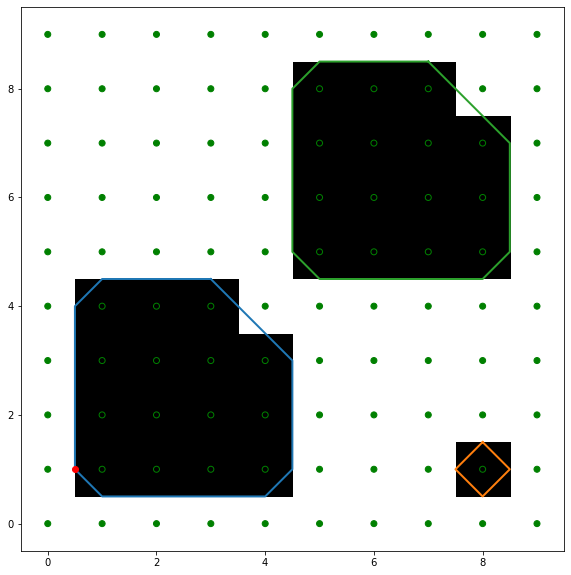

In [16]:
# Display the image, the binary index, the contours,
# and a linearly interpolated point (red dot).

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(a, cmap=plt.cm.gray_r, origin="lower")

plt.scatter(x, y, c=clrs, edgecolors="green")

for n, contour in enumerate(contours):
    print(f"Coordinates (contour {n + 1})\nx: {contour[:, 1]}\ny: {contour[:, 0]}\n")
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2, zorder=1)
    
plt.scatter(r[0], r[1], c="red", edgecolors="red", zorder=2)

plt.show()

In [17]:
# The choice of the threshold or isovalue is important. 
# This value affects linear interpolation and can yield less accurate contours.

# Check the warning in the notes:
# https://scikit-image.org/docs/dev/api/skimage.measure.html#find-contours

THRESHOLD_2 = 0.25
contours_2 = measure.find_contours(a, THRESHOLD_2)
clrs_2 = ['green' if (x <= THRESHOLD_2) else 'none' for x in a_flat ]

In [18]:
# The same coordinates and values as in the previous example, 
# but now with a different (lower) threshold.

r_2 = linear_interpolation(p, sp, q, sq, THRESHOLD_2)

Coordinates:
x = 0.25
y = 1.0


Coordinates (contour 1)
x: [3.   2.   1.   0.25 0.25 0.25 0.25 1.   2.   3.   4.   4.75 4.75 4.75
 4.   3.75 3.  ]
y: [4.75 4.75 4.75 4.   3.   2.   1.   0.25 0.25 0.25 0.25 1.   2.   3.
 3.75 4.   4.75]

Coordinates (contour 2)
x: [8.   7.25 8.   8.75 8.  ]
y: [1.75 1.   0.25 1.   1.75]

Coordinates (contour 3)
x: [7.   6.   5.   4.25 4.25 4.25 4.25 5.   6.   7.   8.   8.75 8.75 8.75
 8.   7.75 7.  ]
y: [8.75 8.75 8.75 8.   7.   6.   5.   4.25 4.25 4.25 4.25 5.   6.   7.
 7.75 8.   8.75]



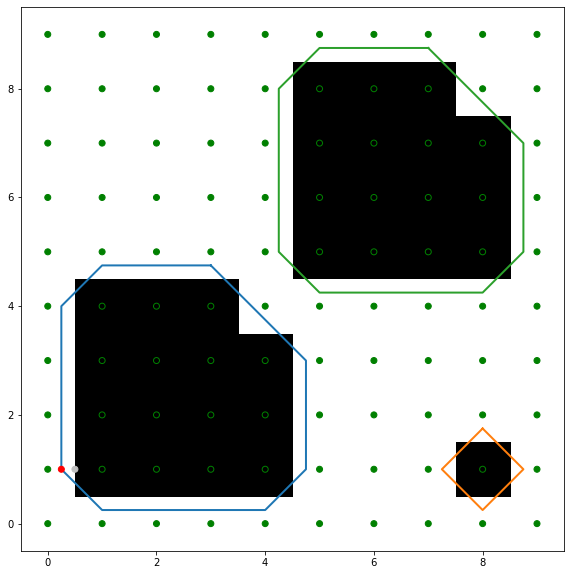

In [19]:
# Display the image, the binary index, the contours,
# the previous linearly interpolated point (gray dot),
# and a new linearly interpolated point (red dot).

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(a, cmap=plt.cm.gray_r, origin="lower")

plt.scatter(x, y, c=clrs_2, edgecolors="green")

for n, contour in enumerate(contours_2):
    print(f"Coordinates (contour {n + 1})\nx: {contour[:, 1]}\ny: {contour[:, 0]}\n")
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2, zorder=1)
    
plt.scatter([r[0], r_2[0]], [r[1], r_2[1]], c=["silver", "red"], edgecolors=["silver", "red"], zorder=2)

plt.show()